In [70]:
from PIL import Image
import os.path, sys
import matplotlib.pyplot as plt



max_rows = 2
rotation_max_cols = 5
filter_max_cols = 6

In [71]:
x_labels = ['none', 'freaky_details', 'normalize_local', 'boost_chroma', 'mighty_details', 'sharpen']
images = [
    {
        'name': 'harebell_efficientnet, EfficientNetB0 100%, Gradcam',
        'title': 'harebell',
        'path': './aug_crop1/filter/harebell_efficientnet',
        'scores': [0.9982, 0.9955, 0.9981, 0.9946, 0.9627, 0.9870]
    },
    {
        'name': 'cardigan_efficientnet, EfficientNetB0 100%, Gradcam',
        'title': 'cardigan',
        'path': './aug_crop1/filter/cardigan_efficientnet',
        'scores': [0.9987, 0.9993, 0.9996, 0.9990, 0.9997, 0.9997]
    },
    {
        'name': 'pancakes_resnet, EfficientNetB0 100%, Gradcam',
        'title': 'pancakes',
        'path': './aug_crop1/filter/pancakes_resnet',
        'scores': [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000]
    }
]

In [72]:
path = "./aug_crop1/rotation"
image_pos = (14, 103, 14 + 368, 103 + 367)
attr_pos = (407, 103, 407 + 368, 103 + 367)
all_images = []

def crop(img_pos, att_pos, base_dir):
    croppedImgs = []
    croppedAttrs = []
    for item in dirs:
        fullpath = os.path.join(base_dir,item)        
        if os.path.isfile(fullpath):
            im = Image.open(fullpath)
            imCrop = im.crop(img_pos) 
            attCrop = im.crop(attr_pos) 
            croppedImgs.append(imCrop)
            croppedAttrs.append(attCrop)
            
    return croppedImgs, croppedAttrs


for img_def in images:
    dirs = os.listdir(img_def['path'])
    dirs.sort()
    print(dirs)
    imgs, attrs = crop(image_pos, attr_pos, img_def['path'])
    all_images = all_images + imgs + attrs
    
    

['20-0-64-none-harebell_flower-harebell_flower.png', '20-1-64-fx_freaky_details 2,10,1,11,0,32,0-harebell_flower-harebell_flower.png', '20-2-64-normalize_local 8,10-harebell_flower-harebell_flower.png', '20-3-64-fx_boost_chroma 90,0,0-harebell_flower-harebell_flower.png', '20-4-64-fx_mighty_details 25,1,25,1,11,0-harebell_flower-harebell_flower.png', '20-5-64-sharpen 300-harebell_flower-harebell_flower.png']
['16-0-50-none-Cardigan-Cardigan.png', '16-1-50-fx_freaky_details 2,10,1,11,0,32,0-Cardigan-Cardigan.png', '16-2-50-normalize_local 8,10-Cardigan-Cardigan.png', '16-3-50-fx_boost_chroma 90,0,0-Cardigan-Cardigan.png', '16-4-50-fx_mighty_details 25,1,25,1,11,0-Cardigan-Cardigan.png', '16-5-50-sharpen 300-Cardigan-Cardigan.png']
['14-0-72-none-Pancakes-Pancakes.png', '14-1-72-fx_freaky_details 2,10,1,11,0,32,0-Pancakes-Pancakes.png', '14-2-72-normalize_local 8,10-Pancakes-Pancakes.png', '14-3-72-fx_boost_chroma 90,0,0-Pancakes-Pancakes.png', '14-4-72-fx_mighty_details 25,1,25,1,11,0-P

Figure(1728x1728)


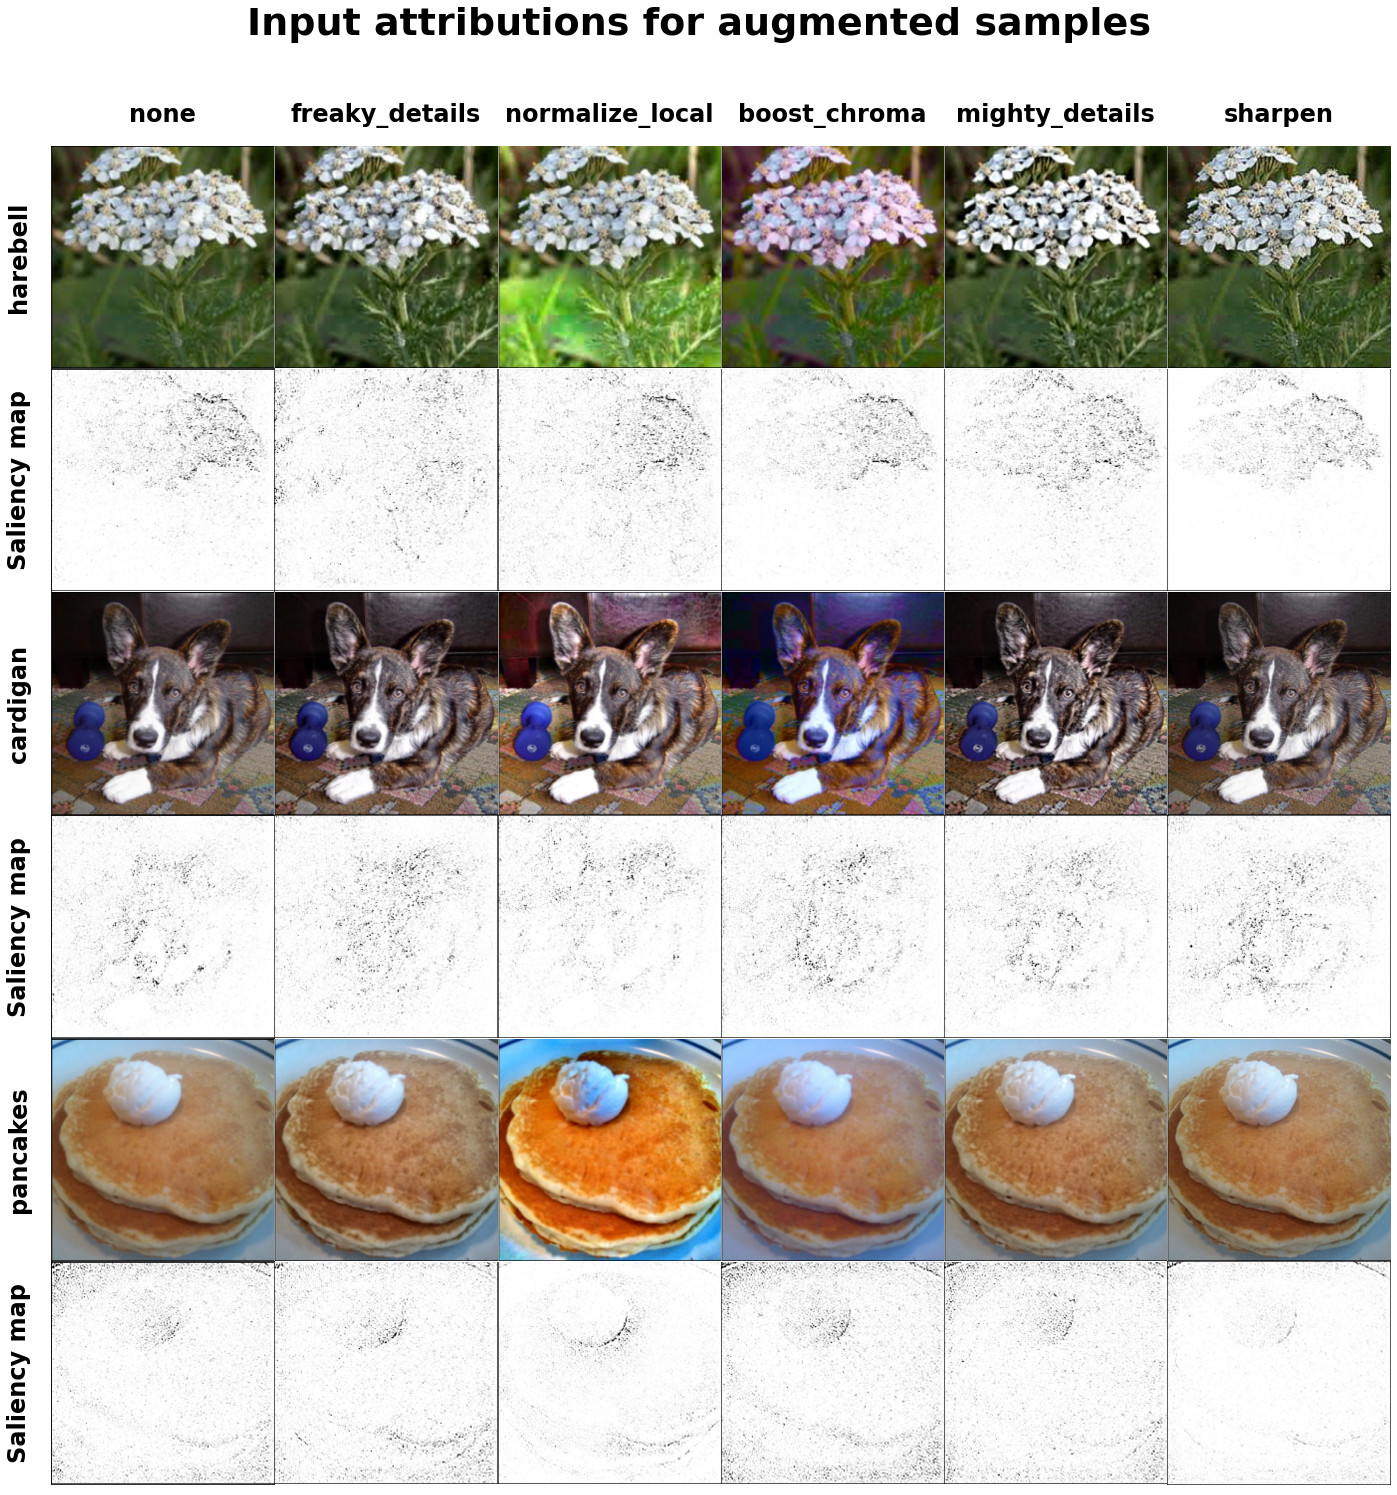

In [73]:
fig, axes = plt.subplots(
    nrows=max_rows*len(images), 
    ncols=filter_max_cols, 
    figsize=(4*filter_max_cols,4*max_rows*len(images))
)
for idx, image in enumerate(all_images):
    row = idx // filter_max_cols
    col = idx % filter_max_cols
    axes[row, col].axis("off")
    axes[row, col].imshow(image, cmap="Accent")
    
    
for col in range(0, filter_max_cols):
    axes[0, col].set_title(x_labels[col], fontsize=24, pad=24, fontweight='bold')
    
for idx, img_def in enumerate(images):
    axes[idx*2, 0].set_ylabel(img_def['title'], fontsize=24, fontweight='bold', labelpad=20)
    axes[idx*2, 0].axis('on')
    axes[idx*2, 0].set_yticks([])
    axes[idx*2+1, 0].set_ylabel('Saliency map', fontsize=24, fontweight='bold', labelpad=20)
    axes[idx*2+1, 0].axis('on')
    axes[idx*2+1, 0].set_yticks([])
    axes[idx*2+1, 0].set_xticks([])
    
print(fig)

# for ax in axes.flat:
#     ax.set_title('x-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axes.flat:
    ax.label_outer()
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('equal')
fig.subplots_adjust(top=0.90)
fig.suptitle('Input attributions for augmented samples', fontsize=38,fontweight='bold')
# plt.set_title('Input attributions for augmented samples', fontsize=38,fontweight='bold')
plt.show()

In [74]:

fig.savefig(f'../../augmentation-results/filters-sample.jpg', bbox_inches='tight')
fig.savefig(f'../../augmentation-results/filters-sample.png', bbox_inches='tight')

In [78]:
aug_example_images = all_images[12:18]

In [79]:

dirs = os.listdir("./aug_crop1/rotation/cardogam_resnet")
dirs.sort()
print(dirs)
imgs, attrs = crop(image_pos, attr_pos, "./aug_crop1/rotation/cardogam_resnet")
aug_example_images = aug_example_images + imgs

['16-2-50-rotation--15-Cardigan-Cardigan.png', '16-3-50-rotation-15-Cardigan-Cardigan.png']


In [80]:

aug_example_images

[<PIL.Image.Image image mode=RGBA size=368x367 at 0x7FC354EDE100>,
 <PIL.Image.Image image mode=RGBA size=368x367 at 0x7FC354EDED90>,
 <PIL.Image.Image image mode=RGBA size=368x367 at 0x7FC354EE0460>,
 <PIL.Image.Image image mode=RGBA size=368x367 at 0x7FC354EE02B0>,
 <PIL.Image.Image image mode=RGBA size=368x367 at 0x7FC354EE07F0>,
 <PIL.Image.Image image mode=RGBA size=368x367 at 0x7FC354EE0790>,
 <PIL.Image.Image image mode=RGBA size=368x367 at 0x7FC3532ED670>,
 <PIL.Image.Image image mode=RGBA size=368x367 at 0x7FC35380CA30>]

Figure(576x1152)


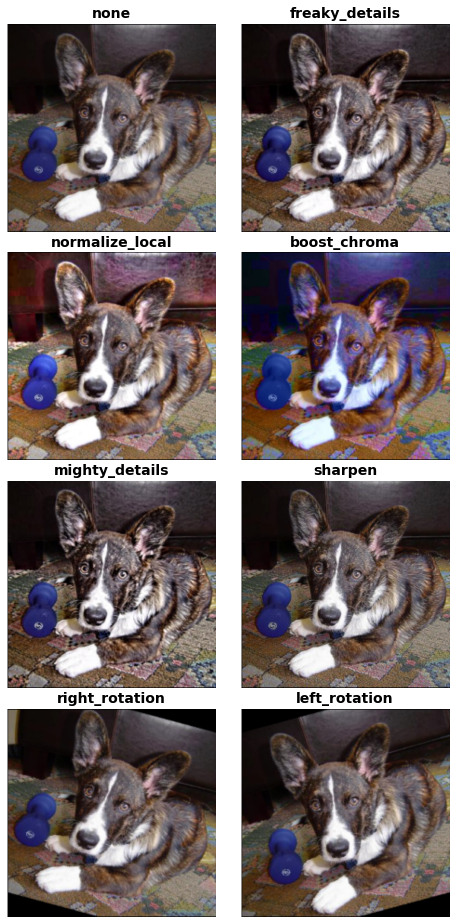

In [83]:
fig, axes = plt.subplots(
    nrows=4, 
    ncols=2, 
    figsize=(4*2,4*4)
)
titles = x_labels + [
    'right_rotation',
    'left_rotation',
]
for idx, image in enumerate(aug_example_images):
    row = idx // 2
    col = idx % 2
    axes[row, col].axis("off")
    axes[row, col].imshow(image, cmap="Accent")
    axes[row, col].set_title(titles[idx], fontsize=14,fontweight='bold')
    
    
# for col in range(0, filter_max_cols):
#     axes[0, col].set_title(x_labels[col], fontsize=24, pad=24, fontweight='bold')
    
# for idx, img_def in enumerate(images):
#     axes[idx*2, 0].set_ylabel(img_def['title'], fontsize=24, fontweight='bold', labelpad=20)
#     axes[idx*2, 0].axis('on')
#     axes[idx*2, 0].set_yticks([])
#     axes[idx*2+1, 0].set_ylabel('Saliency map', fontsize=24, fontweight='bold', labelpad=20)
#     axes[idx*2+1, 0].axis('on')
#     axes[idx*2+1, 0].set_yticks([])
#     axes[idx*2+1, 0].set_xticks([])
    
print(fig)

# for ax in axes.flat:
#     ax.set_title('x-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axes.flat:
    ax.label_outer()
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.axis('equal')
fig.subplots_adjust(top=0.90)
# fig.suptitle('Applied augmentations', fontsize=32,fontweight='bold')
# plt.set_title('Input attributions for augmented samples', fontsize=38,fontweight='bold')
plt.show()

In [84]:

fig.savefig(f'../../augmentation-results/augmentations_example.jpg', bbox_inches='tight')
fig.savefig(f'../../augmentation-results/augmentations_example.png', bbox_inches='tight')